In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
IMAGES_DIR_PATH="C:\\Users\\HP\\Desktop\\ML\\Number plate recogniton system\\images"
ANNOTATIONS_DIR_PATH="C:\\Users\\HP\Desktop\\ML\\Number plate recogniton system\\annotations"

In [42]:
import os
images=[os.path.join(IMAGES_DIR_PATH,f) for f in os.listdir(IMAGES_DIR_PATH)]

In [43]:
import os
ann_xmls=[os.path.join(ANNOTATIONS_DIR_PATH,f) for f in os.listdir(ANNOTATIONS_DIR_PATH)]

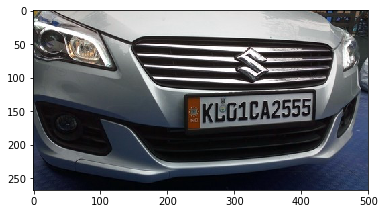

In [44]:
import cv2
img=cv2.imread(images[0])
plt.imshow(img)


# img.shape

#To view the image using opencv
# cv2.imshow("image0",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [45]:
import xml.etree.ElementTree as ET


boxes=[]
for ax in ann_xmls:
    root=ET.parse(ax).getroot()


    ob=root.find('object')
    
    xmin=int(ob.find('bndbox/xmin').text)
    ymin=int(ob.find('bndbox/ymin').text)
    xmax=int(ob.find('bndbox/xmax').text)
    ymax=int(ob.find('bndbox/ymax').text)

    boxes.append([xmin, ymin, xmax, ymax])

len(boxes)


198 271 70 262


198 271 70 262


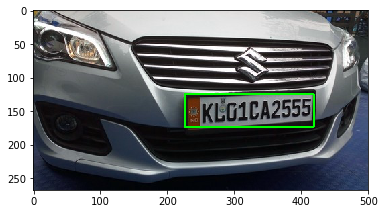

In [38]:

img=cv2.imread(images[0])
img=cv2.rectangle(img,(boxes[0][0],boxes[0][1]),(boxes[0][2],boxes[0][3]),(0,255,0),2)
plt.imshow(img)

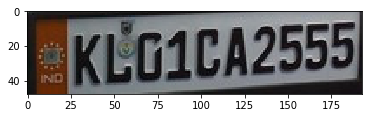

In [46]:
img_crop=img[boxes[0][1]:boxes[0][3],boxes[0][0]:boxes[0][2]]

plt.imshow(img_crop)

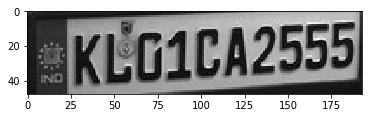

In [69]:
img_gray=cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

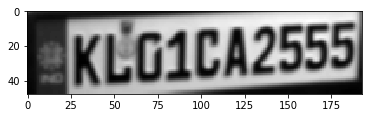

In [70]:
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
plt.imshow(img_blur,cmap="gray")

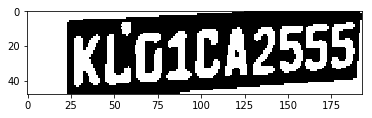

In [71]:
img_bw=cv2.threshold(img_blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)[1]
plt.imshow(img_bw, cmap="gray")

In [90]:
_,contours,_=cv2.findContours(img_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

print(len(contours))

15


In [2]:
# from pytesseract import image_to_string as im_2_st
import pytesseract
answer=""
for cont in contours:
    x,y,w,h=cv2.boundingRect(cont)
    
    img_h,img_w=img_bw.shape
    

    if img_h/float(h)>6: continue
    
    if img_w/float(w)>15: continue
    
    ratio = h / float(w)
    if ratio < 1.5: continue
        
    area = h * w
    if area < 100: continue
        
    roi=img_bw[y:y+h,x:x+w]
    
    text=im_2_st(roi,config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
    answer+=text
    
    cv2.imshow("img",roi)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
print(answer)

ModuleNotFoundError: No module named 'pytesseract'

In [2]:
import pytesseract

ModuleNotFoundError: No module named 'pytesseract'

In [3]:
!pip install numpy

In [1]:
from platform import python_version

print(python_version())

3.7.3
